# Some observation about hv scans at i05
When performing an hv scan, one can observe that the Fermi level is not scaling in the same way as the photon energy. To quantify this effect, I checked the scaling of the for data taken on 2017-04-20, which you can see below.

In [12]:
%matplotlib inline

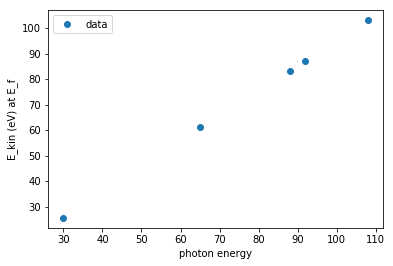

In [44]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
photon_energy = np.array([108,92,88,65,30])
Ekin_at_Ef = np.array([103.06,87.19,83.22,61.38,25.586])
plt.plot(photon_energy, Ekin_at_Ef,'o', label='data');
plt.xlabel('photon energy');
plt.ylabel('E_kin (eV) at E_f');
plt.legend();

To compensate for the scaling of the Fermi level, we usually scan the center energy together with the photon energy with a linear scaling constant without an offset

[ 0.94652847]


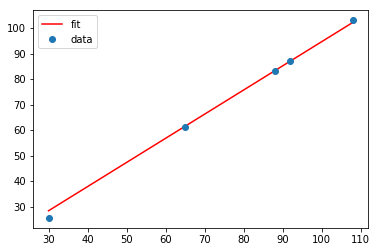

In [45]:
def linear_funct(x, a):
    return a * x
popt, pcov = curve_fit(linear_funct, photon_energy, Ekin_at_Ef);
plt.plot(photon_energy, linear_funct(photon_energy, *popt), 'r-', label='fit');
plt.plot(photon_energy, Ekin_at_Ef,'o', label='data');
plt.legend();
print(popt)

we can see that the optimal linear scaling without offset (scaling constant 0.9465) deviates for low photon energies. This deviation can be reduced by introducing an offset.

[ 0.99016244 -3.75924289]


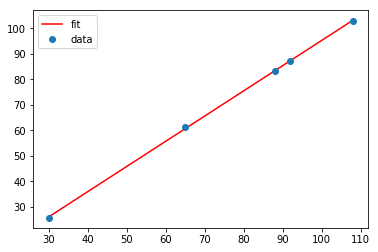

In [49]:
def linear_funct2(x, a, b):
    return (a * x) + b
popt, pcov = curve_fit(linear_funct2, photon_energy, Ekin_at_Ef);
plt.plot(photon_energy, linear_funct2(photon_energy, *popt), 'r-', label='fit');
plt.plot(photon_energy, Ekin_at_Ef,'o', label='data');
plt.legend();
print(popt)

now the scaling constant is 0.9901 and the offset is -3.7592